In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
# Define maximum size and lambda
numMaxSamples = 1000;
numProblems = 30;
params = {'n_neighbors':list(range(1,100,1))}

# Initialize empty arrays to save the results
accuracyKnnPerDim = [];
neighborsKnnPerDim = [];
accuracyLogPerDim = [];

# Each dimension to test
for dim in range(25,501,25):

  # Initialize variables to compute
  accuracyKnn = 0;
  accuracyLog = 0;
  neighborsKnn = 0;

  # Number of problems to test
  for prob in range(numProblems):

    # Make new classification and split into train and test
    samples = np.random.randint(500, numMaxSamples);
    X, Y = make_classification(n_samples=samples,n_features=dim,n_informative=dim,n_redundant=0);
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, shuffle=True);
    
    # Knn classifier with grid search for best neighbor param
    clf = GridSearchCV(KNeighborsClassifier(), param_grid=params, n_jobs=1).fit(Xtrain,Ytrain);
    neighborsKnn = neighborsKnn + clf.best_params_['n_neighbors'];
    classifierKnn = KNeighborsClassifier(n_neighbors=clf.best_params_['n_neighbors'],n_jobs=1).fit(Xtrain,Ytrain);
    accuracyKnn = accuracyKnn + classifierKnn.score(Xtest,Ytest);
    
    # Logistic regression
    classifierLog = LogisticRegressionCV(max_iter=100000).fit(Xtrain,Ytrain);
    accuracyLog = accuracyLog + classifierLog.score(Xtest,Ytest);

  # Show and save results
  print("DIM: ",dim);
  print("Knn average neighbors: ", neighborsKnn/numProblems);
  print("Knn average accuracy: ", accuracyKnn/numProblems);
  print("Log average accuracy: ", accuracyLog/numProblems);
  accuracyKnnPerDim.append(accuracyKnn/numProblems);
  neighborsKnnPerDim.append(neighborsKnn/numProblems);
  accuracyLogPerDim.append(accuracyLog/numProblems);

DIM:  25
Knn average neighbors:  9.133333333333333
Knn average accuracy:  0.9340663561263894
Log average accuracy:  0.8211831222490639
DIM:  50
Knn average neighbors:  13.4
Knn average accuracy:  0.9332944810398318
Log average accuracy:  0.8137485167141875
DIM:  75
Knn average neighbors:  17.233333333333334
Knn average accuracy:  0.9251729900789694
Log average accuracy:  0.8014197064553374
DIM:  100
Knn average neighbors:  16.633333333333333
Knn average accuracy:  0.9213704856950253
Log average accuracy:  0.7903702048617132
DIM:  125
Knn average neighbors:  15.766666666666667
Knn average accuracy:  0.9203239037328909
Log average accuracy:  0.7748959072219752
DIM:  150
Knn average neighbors:  21.633333333333333
Knn average accuracy:  0.9276084561938646
Log average accuracy:  0.7736307606182873
DIM:  175
Knn average neighbors:  17.966666666666665
Knn average accuracy:  0.9156072308074378
Log average accuracy:  0.7700950514689777
DIM:  200
Knn average neighbors:  23.933333333333334
Knn av

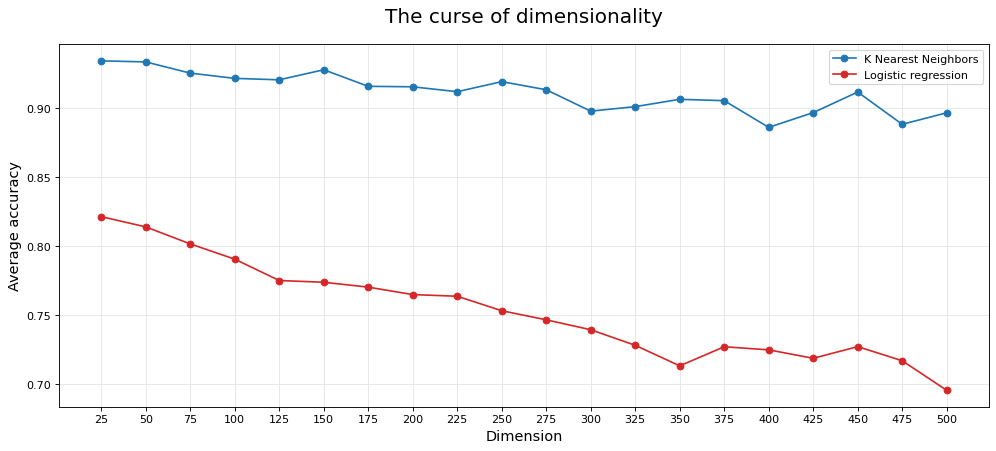

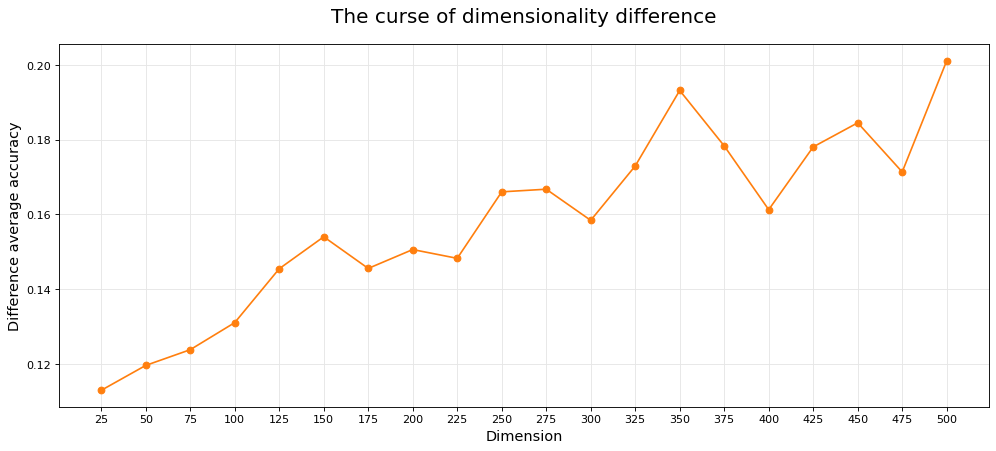

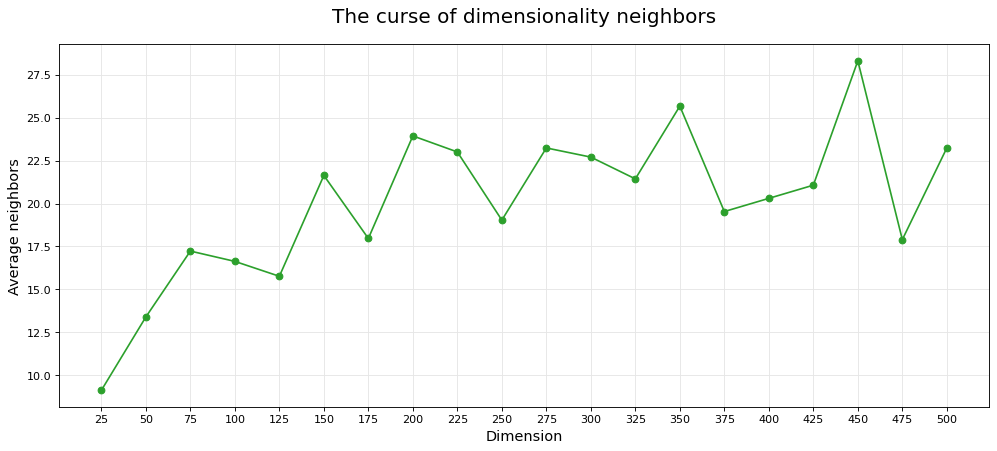

In [ ]:
xvalues = range(25,501,25)
names = list(map(str, xvalues))

plt.figure(figsize=(15, 6), dpi=80)
plt.title("The curse of dimensionality", fontsize=18, pad=20);
plt.xticks(xvalues,names);
plt.ylabel('Average accuracy',fontsize=13);
plt.xlabel('Dimension',fontsize=13);
plt.plot(xvalues,accuracyKnnPerDim,marker="o",color='tab:blue')
plt.plot(xvalues,accuracyLogPerDim,marker="o",color='tab:red')
plt.legend(["K Nearest Neighbors", "Logistic regression"])
plt.grid(axis='both', color='0.90')
plt.savefig('dimensionalityPlot.png',bbox_inches='tight')
plt.show()

difference = [];
for i, knn in enumerate(accuracyKnnPerDim):
  difference.append(knn-accuracyLogPerDim[i])

plt.figure(figsize=(15, 6), dpi=80)
plt.title("The curse of dimensionality difference", fontsize=18, pad=20);
plt.xticks(xvalues,names);
plt.ylabel('Difference average accuracy',fontsize=13);
plt.xlabel('Dimension',fontsize=13);
plt.plot(xvalues,difference,marker="o",color='tab:orange')
plt.grid(axis='both', color='0.90')
plt.savefig('dimensionalityPlotDiff.png',bbox_inches='tight')
plt.show()

plt.figure(figsize=(15, 6), dpi=80)
plt.title("The curse of dimensionality neighbors", fontsize=18, pad=20);
plt.xticks(xvalues,names);
plt.ylabel('Average neighbors',fontsize=13);
plt.xlabel('Dimension',fontsize=13);
plt.plot(xvalues,neighborsKnnPerDim,marker="o",color='tab:green')
plt.grid(axis='both', color='0.90')
plt.savefig('dimensionalityPlotNeig.png',bbox_inches='tight')
plt.show()